In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is version 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.1.3
3.4.2


In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation2 import get_model_for_problem_formulation, sum_over, sum_over_time

In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-4
# each problem formulation has its own list of outcomes
# 0: is our problem formulation (Veluwe); 1: different problem formulation with 2 kinds of costs together for Veluwe.
# 2: problem formulation Zutphen, 3: problem formulation Doesburg & Cortenoever; 4: problem formulation Overijssel
dike_model, planning_steps = get_model_for_problem_formulation(0)

In [5]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [6]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [7]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage'), function=<function sum_over at 0x158ae37e0>)
ScalarOutcome('RfR Total Costs', variable_name=('RfR Total Costs',), function=<function sum_over at 0x158ae37e0>)
ScalarOutcome('Dike Investment Costs', variable_name=('RfR Total Costs',), function=<function sum_over at 0x158ae37e0>)


In [8]:
# running the model through EMA workbench
with (MultiprocessingEvaluator(dike_model) as evaluator):
    results= evaluator.perform_experiments(scenarios=100, policies=275)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 275 policies * 1 model(s) = 27500 experiments
100%|████████████████████████████████████| 27500/27500 [15:02<00:00, 30.49it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [24]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'RfR Total Costs', 'Dike Investment Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,103,217.683174,10.0,0.841797,270.954436,1.0,0.174278,337.892242,1.5,0.435198,...,9,6,4,2,5,7,0,275,0,dikesnet
1,131,192.830558,10.0,0.380209,194.257699,1.0,0.834496,302.265017,1.0,0.835073,...,9,6,4,2,5,7,0,276,0,dikesnet
2,24,119.543819,1.0,0.863675,249.308526,10.0,0.912437,253.897228,1.5,0.850463,...,9,6,4,2,5,7,0,277,0,dikesnet
3,45,200.979780,1.0,0.834957,341.558981,1.0,0.183517,163.527760,1.0,0.956269,...,9,6,4,2,5,7,0,278,0,dikesnet
4,58,164.877971,1.5,0.412863,258.608157,1.5,0.529751,153.842555,1.0,0.640369,...,9,6,4,2,5,7,0,279,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,109,171.222359,1.5,0.102939,58.239493,1.5,0.996751,236.126664,10.0,0.085617,...,2,9,0,1,8,6,1,370,274,dikesnet
27496,3,43.605502,1.0,0.230537,150.495842,1.5,0.704171,93.156951,10.0,0.237641,...,2,9,0,1,8,6,1,371,274,dikesnet
27497,78,72.980798,1.0,0.601053,61.602484,1.0,0.504269,318.892383,10.0,0.056292,...,2,9,0,1,8,6,1,372,274,dikesnet
27498,56,62.319860,1.0,0.097715,71.585366,10.0,0.432779,349.205679,1.0,0.505066,...,2,9,0,1,8,6,1,373,274,dikesnet


In [25]:
experiments.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

In [26]:
# only works because we have scalar outcomes
outcomes_pd = pd.DataFrame(outcomes)
outcomes_pd

,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
0,0.0,8.623000e+08,8.623000e+08
1,0.0,8.623000e+08,8.623000e+08
2,0.0,8.623000e+08,8.623000e+08
3,0.0,8.623000e+08,8.623000e+08
4,0.0,8.623000e+08,8.623000e+08
...,...,...,...
27495,0.0,1.043500e+09,1.043500e+09
27496,0.0,1.043500e+09,1.043500e+09
27497,0.0,1.043500e+09,1.043500e+09
27498,0.0,1.043500e+09,1.043500e+09


In [27]:
tot = experiments.join(outcomes_pd)
tot


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
0,103,217.683174,10.0,0.841797,270.954436,1.0,0.174278,337.892242,1.5,0.435198,...,2,5,7,0,275,0,dikesnet,0.0,8.623000e+08,8.623000e+08
1,131,192.830558,10.0,0.380209,194.257699,1.0,0.834496,302.265017,1.0,0.835073,...,2,5,7,0,276,0,dikesnet,0.0,8.623000e+08,8.623000e+08
2,24,119.543819,1.0,0.863675,249.308526,10.0,0.912437,253.897228,1.5,0.850463,...,2,5,7,0,277,0,dikesnet,0.0,8.623000e+08,8.623000e+08
3,45,200.979780,1.0,0.834957,341.558981,1.0,0.183517,163.527760,1.0,0.956269,...,2,5,7,0,278,0,dikesnet,0.0,8.623000e+08,8.623000e+08
4,58,164.877971,1.5,0.412863,258.608157,1.5,0.529751,153.842555,1.0,0.640369,...,2,5,7,0,279,0,dikesnet,0.0,8.623000e+08,8.623000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,109,171.222359,1.5,0.102939,58.239493,1.5,0.996751,236.126664,10.0,0.085617,...,1,8,6,1,370,274,dikesnet,0.0,1.043500e+09,1.043500e+09
27496,3,43.605502,1.0,0.230537,150.495842,1.5,0.704171,93.156951,10.0,0.237641,...,1,8,6,1,371,274,dikesnet,0.0,1.043500e+09,1.043500e+09
27497,78,72.980798,1.0,0.601053,61.602484,1.0,0.504269,318.892383,10.0,0.056292,...,1,8,6,1,372,274,dikesnet,0.0,1.043500e+09,1.043500e+09
27498,56,62.319860,1.0,0.097715,71.585366,10.0,0.432779,349.205679,1.0,0.505066,...,1,8,6,1,373,274,dikesnet,0.0,1.043500e+09,1.043500e+09


[MainProcess/INFO] no time dimension found in results


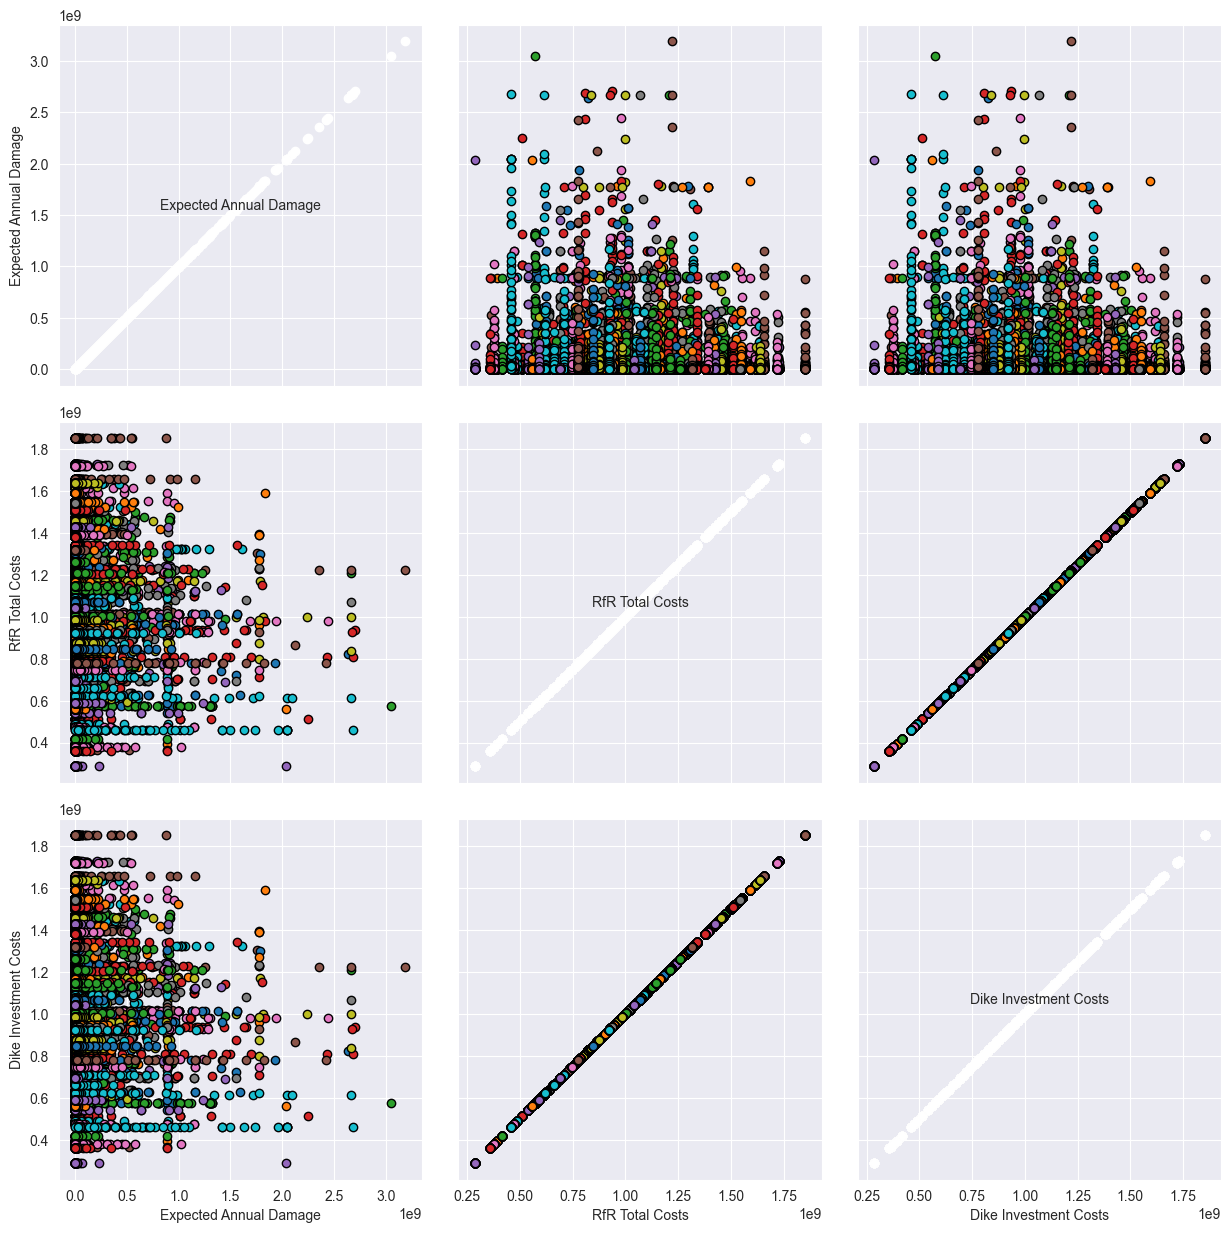

In [28]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(tot, outcomes, group_by='policy',legend=False)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

In [29]:
tot_policy = tot.groupby('policy').mean(numeric_only=True)
tot_policy.sort_values(by=tot_policy.columns[-1], ascending=True, inplace=True)
tot_policy

/var/folders/cq/_rbxzkq17533m5qdt1c__dyw0000gn/T/ipykernel_89224/255886294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot_policy = tot.groupby('policy').mean(numeric_only=True)


,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.2_Bmax,A.2_pfail,A.3_Bmax,A.3_pfail,A.4_Bmax,A.4_pfail,A.5_Bmax,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
policy,,,,,,,,,,,,,,,,,,,,,
194,65.99,189.951535,0.499867,190.014208,0.499759,190.076413,0.500008,189.938134,0.500164,189.945595,...,6.0,8.0,0.0,2.0,9.0,7.0,2.0,2.556455e+07,2.868000e+08,2.868000e+08
253,65.99,189.951535,0.499867,190.014208,0.499759,190.076413,0.500008,189.938134,0.500164,189.945595,...,10.0,5.0,0.0,4.0,9.0,6.0,3.0,1.850671e+07,3.577000e+08,3.577000e+08
95,65.99,189.951535,0.499867,190.014208,0.499759,190.076413,0.500008,189.938134,0.500164,189.945595,...,10.0,5.0,3.0,1.0,4.0,8.0,4.0,2.687262e+07,3.638000e+08,3.638000e+08
166,65.99,189.951535,0.499867,190.014208,0.499759,190.076413,0.500008,189.938134,0.500164,189.945595,...,10.0,3.0,3.0,7.0,1.0,7.0,4.0,7.067678e+07,3.773000e+08,3.773000e+08
41,65.99,189.951535,0.499867,190.014208,0.499759,190.076413,0.500008,189.938134,0.500164,189.945595,...,6.0,4.0,2.0,2.0,9.0,9.0,3.0,1.286053e+07,3.945000e+08,3.945000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,65.99,189.951535,0.499867,190.014208,0.499759,190.076413,0.500008,189.938134,0.500164,189.945595,...,7.0,9.0,2.0,8.0,8.0,0.0,3.0,7.352783e+07,1.658200e+09,1.658200e+09
236,65.99,189.951535,0.499867,190.014208,0.499759,190.076413,0.500008,189.938134,0.500164,189.945595,...,9.0,10.0,1.0,6.0,6.0,0.0,3.0,1.979127e+07,1.719600e+09,1.719600e+09
47,65.99,189.951535,0.499867,190.014208,0.499759,190.076413,0.500008,189.938134,0.500164,189.945595,...,8.0,2.0,7.0,9.0,10.0,2.0,1.0,3.930238e+07,1.723200e+09,1.723200e+09


In [30]:
# outcomes to dataframe
outcomes_df = pd.DataFrame.from_dict(outcomes)

# right columns
columns = ["RfR Total Costs", "Expected Annual Damage", "Dike Investment Costs"]

# calculate mean, max, min
summary = outcomes_df[columns].agg(['mean', 'max', 'min'])

# calculate in millions
summary.loc[:, "RfR Total Costs"] = summary["RfR Total Costs"] / 1e6
summary.loc[:, "Expected Annual Damage"] = summary["Expected Annual Damage"] / 1e6
summary.loc[:, "Dike Investment Costs"] = summary["Dike Investment Costs"] / 1e6

# round to two decimals
summary = summary.round(2)

# change index names
summary.index = ['Mean', 'Maximum', 'Minimum']
summary

,RfR Total Costs,Expected Annual Damage
Mean,1064.7,41.47
Maximum,1852.0,3191.21
Minimum,286.8,0.00


In [31]:
summary

,RfR Total Costs,Expected Annual Damage
Mean,1064.7,41.47
Maximum,1852.0,3191.21
Minimum,286.8,0.00


In [32]:
# # defining specific policies
# # for example, policy 1 is about extra protection in upper boundary
# # policy 2 is about extra protection in lower boundary
# # policy 3 is extra protection in random locations
#
#
# def get_do_nothing_dict():
#     return {l.name: 0 for l in dike_model.levers}
#
#
# policies = [
#     Policy(
#         "policy 1",
#         **dict(
#             get_do_nothing_dict(),
#             **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
#         )
#     ),
#     Policy(
#         "policy 2",
#         **dict(
#             get_do_nothing_dict(),
#             **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
#         )
#     ),
#     Policy(
#         "policy 3",
#         **dict(
#             get_do_nothing_dict(),
#             **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
#         )
#     ),
# ]

In [33]:
# # pass the policies list to EMA workbench experiment runs
# n_scenarios = 100
# with MultiprocessingEvaluator(dike_model) as evaluator:
#     results = evaluator.perform_experiments(n_scenarios, policies)

In [34]:
# experiments, outcomes = results

In [35]:
# only works because we have scalar outcomes
# pd.DataFrame(outcomes)

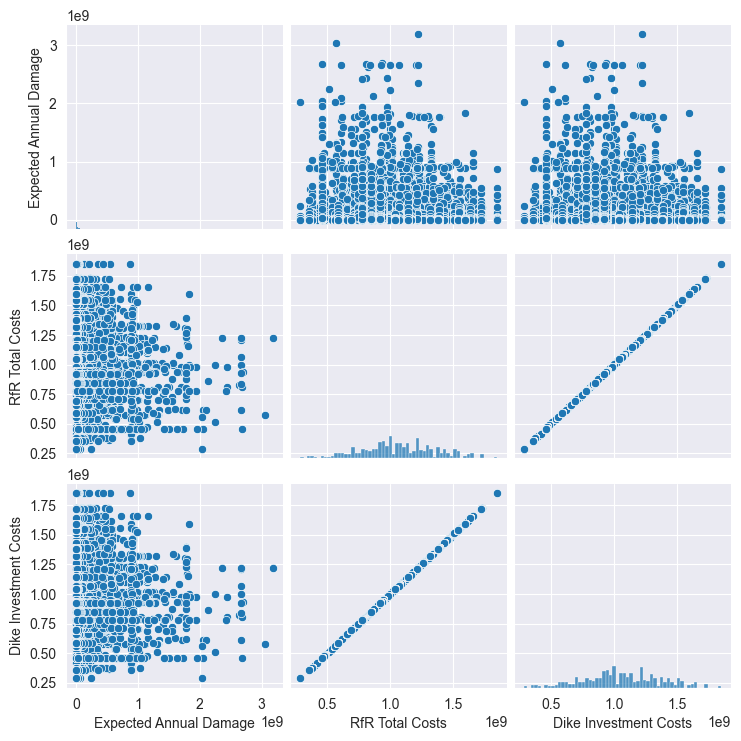

In [36]:
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

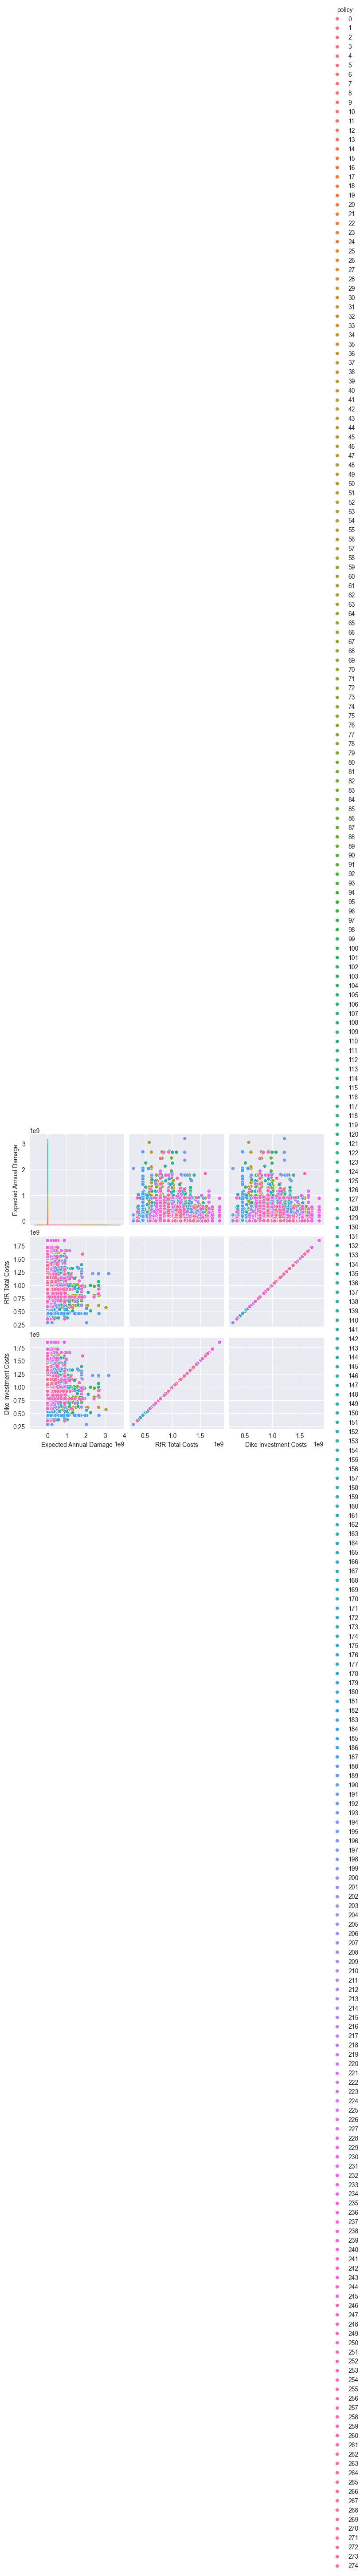

In [37]:
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

sns.pairplot(data, hue='policy',  vars=outcomes.keys())
plt.show()

In [39]:
from ema_workbench import save_results


save_results(results, 'dike_open_exploration_results.tar.gz')

[MainProcess/INFO] results saved successfully to /Users/evalievanoijen/PycharmProjects/group25_mbdm/final assignment/dike_open_exploration_results.tar.gz
